In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
df=pd.read_csv('mc.csv',parse_dates=['pdate'])  #Path location of the dataset
df.head() 

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [2]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.shape 

(209593, 36)

In [4]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.duplicated().sum()

1

In [6]:
df= df.drop_duplicates()

In [7]:
df.pcircle.unique(), df.msisdn.value_counts()

(array(['UPW'], dtype=object),
 04581I85330    7
 47819I90840    7
 87592I84456    6
 94119I84456    6
 43096I88688    6
               ..
 48125I90842    1
 54754I91190    1
 66495I89238    1
 12859I90587    1
 92243I84451    1
 Name: msisdn, Length: 186243, dtype: int64)

1. we can see that "pcircle" - telecom circle has same values for all the columns. which wont help us in predections so we will drop the same.
2. And also "msisdn" - mobile number of user, which mostly have unique values so we are also droping the same. 

In [8]:
df.drop(["msisdn","pcircle"], axis =1, inplace = True)

In [9]:
df.pdate.unique()

array(['2016-07-20T00:00:00.000000000', '2016-08-10T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-06-06T00:00:00.000000000',
       '2016-06-22T00:00:00.000000000', '2016-07-02T00:00:00.000000000',
       '2016-07-05T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-06-15T00:00:00.000000000', '2016-06-08T00:00:00.000000000',
       '2016-06-12T00:00:00.000000000', '2016-06-20T00:00:00.000000000',
       '2016-06-29T00:00:00.000000000', '2016-06-16T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-06-24T00:00:00.000000000',
       '2016-07-04T00:00:00.000000000', '2016-07-03T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-06-26T00:00:00.000000000', '2016-06-23T00:00:00.000000000',
       '2016-07-06T00:00:00.000000000', '2016-07-09T00:00:00.000000000',
       '2016-06-10T00:00:00.000000000', '2016-06-07T00:00:00.000000000',
       '2016-06-27T00:00:00.000000000', '2016-08-11

We can observe that data is taken from year 2016 and mostly of 06, 07, 08 months lets split our date data.

In [10]:
day = df.pdate.dt.day.to_frame()
month = df.pdate.dt.month.to_frame()

date= day.join(month, how='right', lsuffix='_day', rsuffix="_month")
df = df.join(date, how= "left")
df.drop("pdate", inplace = True, axis = 1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,6
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,7
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,7


In [11]:
#mathematical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,209592.0,0.875177,0.330519,0.000000,1.000000,1.000000,1.0000,1.000000
aon,209592.0,8112.380399,75696.261220,-48.000000,246.000000,527.000000,982.0000,999860.755168
daily_decr30,209592.0,5381.412999,9220.644093,-93.012667,42.439500,1469.091833,7244.0960,265926.000000
daily_decr90,209592.0,6082.529123,10918.836919,-93.012667,42.691917,1500.000000,7802.7950,320630.000000
rental30,209592.0,2692.578912,4308.596841,-23737.140000,280.417500,1083.540000,3356.9450,198926.110000
rental90,209592.0,3483.407309,5770.475034,-24720.580000,300.260000,1334.000000,4201.7925,200148.110000
last_rech_date_ma,209592.0,3755.865715,53906.020204,-29.000000,1.000000,3.000000,7.0000,998650.377733
last_rech_date_da,209592.0,3712.220632,53374.960145,-29.000000,0.000000,0.000000,0.0000,999171.809410
last_rech_amt_ma,209592.0,2064.458973,2370.790003,0.000000,770.000000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,209592.0,3.978053,4.256099,0.000000,1.000000,3.000000,5.0000,203.000000


##### Key observations:
    1. From the above data it is clear that the data has no null values.
    2. Catogorical Columns:
        1. label
    3. Continous Data Columns:
        1. Remaining all 31 Columns are continous data,
        2. There is large difference between 75% percentile and max Values which is it has more outliers.
        3. Mean is greater than median which also means data have outliers present.

# EDA

In [12]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt


 Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter 
 while 
 Label ‘0’ indicates that the loan has not been payed i.e. defaulter 

1    183430
0     26162
Name: label, dtype: int64


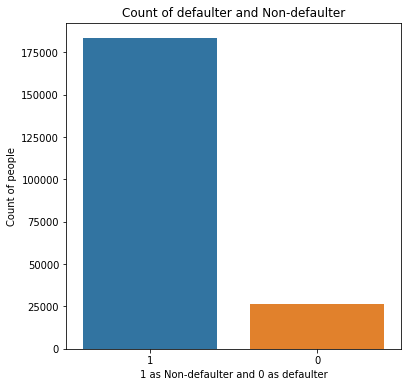

In [13]:
#Counting the number of defaulter and non-defaulter
print('\n','Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter','\n','while', '\n', 'Label ‘0’ indicates that the loan has not been payed i.e. defaulter','\n')
print(df['label'].value_counts())
plt.subplots(figsize=(6,6))
sns.countplot(x='label',data=df,order= df['label'].value_counts().index)
plt.title('Count of defaulter and Non-defaulter')
plt.xlabel('1 as Non-defaulter and 0 as defaulter')
plt.ylabel('Count of people')
plt.show()

1. We can see that 183431 people had payed their loan amount whereas 26162 people didnot pay the amount.

2. Here the dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while label ‘0’ has approximately 12.5% records.

7    85764
6    83154
8    40674
Name: pdate_month, dtype: int64


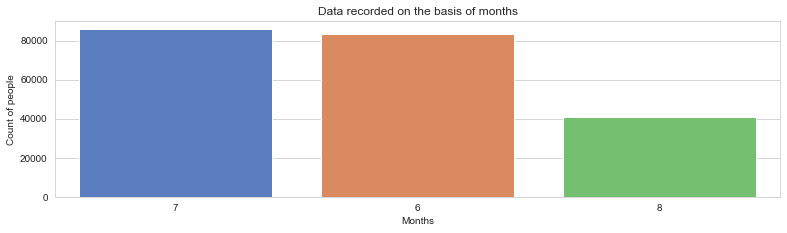

In [14]:
#Data recorded on the basis of months
print(df['pdate_month'].value_counts())
plt.figure(figsize = (13,11))
sns.set_style('whitegrid')
plt.subplot(311)
sns.countplot(x='pdate_month',data=df,palette='muted',order= df['pdate_month'].value_counts().index)
plt.title('Data recorded on the basis of months')
plt.xlabel('Months')
plt.ylabel('Count of people')
plt.show()

1. Maximum number of people records have been recorded in the month of July with a value of 85765 whereas least number of records have been recorded in the month of August with a value of 40674.
2. All the records are recorded in the months of June, July and August respectively.

11    8092
10    8050
6     8030
12    8028
7     8026
5     7989
13    7969
8     7899
2     7839
1     7824
15    7820
14    7816
9     7717
17    7643
3     7607
16    7556
18    7305
4     7154
19    6857
20    6729
21    5964
23    5815
22    5753
27    5283
25    5269
26    5174
30    5129
24    5103
29    5077
28    4897
31    2178
Name: pdate_day, dtype: int64


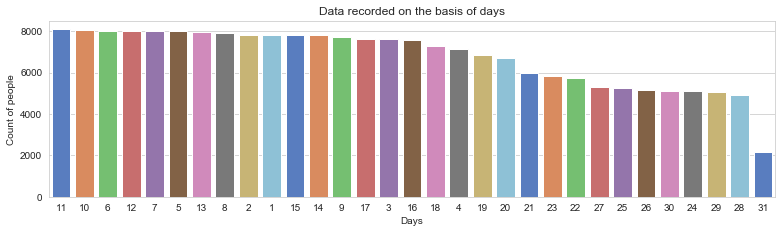

In [15]:
#Data recorded on the basis of days
print(df['pdate_day'].value_counts())
plt.figure(figsize = (13,11))
sns.set_style('whitegrid')
plt.subplot(312)
sns.countplot(x='pdate_day',data=df,palette='muted',order= df['pdate_day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

1. On 11th day, maximum number of people either took the loans or repayed the loan amount. The number of people is 8092.
2. On 31st day, minimum number of people either took the loans or repayed the loan amount. The number of people is 2178.

Here maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days. There are only two options: 6 and 12, for which the people need to pay respectively. We can see that the maximum amount of loan amount taken by the people cannot be more than 13Rs so that we can drop them.

In [16]:
#Checking the records having loan amount > 13
df[df['maxamnt_loans30'] > 13]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
118,1,1454.0,19.578667,19.578667,148.88,148.88,1.0,0.0,770,4,...,61907.697372,0.0,5.0,30,6,0.0,3.500000,3.500000,8,6
125,1,811.0,166.796667,166.796667,-44.88,-44.88,4.0,0.0,2309,9,...,22099.413732,0.5,4.0,24,6,0.5,2.333333,2.333333,22,6
146,1,198.0,18301.000000,28936.470000,8634.10,11994.34,1.0,0.0,4048,5,...,98745.934048,0.5,8.0,48,6,0.0,2.500000,1.750000,10,8
369,1,1737.0,33.000000,33.000000,130.05,130.05,1.0,0.0,773,2,...,58925.364061,0.0,2.0,12,6,0.0,9.500000,9.500000,15,6
374,1,603.0,9970.000000,10770.000000,9343.38,15443.96,9.0,0.0,770,9,...,78232.464324,0.0,3.0,24,12,0.0,3.333333,32.000000,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209189,1,1211.0,16039.000000,18645.190000,8391.52,11936.73,2.0,0.0,1539,5,...,50824.996349,1.0,11.0,96,12,1.0,5.400000,4.900000,8,8
209262,1,904.0,96.906667,96.906667,2516.20,2516.20,5.0,0.0,7526,2,...,17324.994582,0.0,1.0,6,6,0.0,0.000000,0.000000,20,6
209331,1,1846.0,55.680000,55.680000,1140.16,1140.16,5.0,0.0,2309,2,...,92864.501728,0.0,3.0,18,6,0.0,3.500000,3.500000,16,6
209392,1,1639.0,52.031333,52.031333,957.10,957.10,3.0,0.0,1539,6,...,54259.265687,0.0,6.0,36,6,0.0,3.800000,3.800000,17,6


6.0     179192
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64


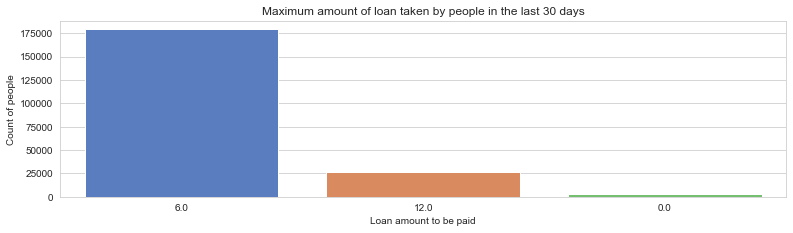



6     180037
12     26477
0       2031
Name: maxamnt_loans90, dtype: int64


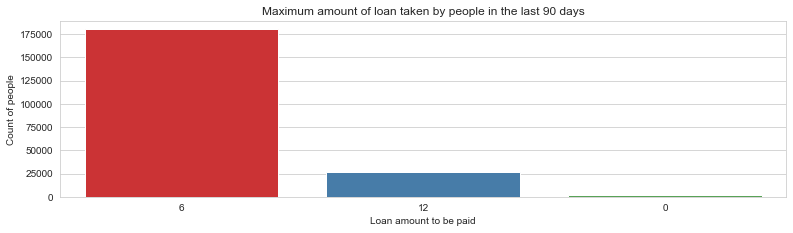

In [17]:
#As there are more than 1000 records which has the unwanted data, we can drop them
df.drop(df[df['maxamnt_loans30'] > 13].index, inplace = True)
#Maximum amount of loan taken by people in last 30 and 90 days
print(df['maxamnt_loans30'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='maxamnt_loans30',data=df,palette='muted',order=df['maxamnt_loans30'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 30 days')
plt.xlabel('Loan amount to be paid')
plt.ylabel('Count of people')
plt.show()
print('\n')
print(df['maxamnt_loans90'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='maxamnt_loans90',data=df,palette='Set1',order=df['maxamnt_loans90'].value_counts().index)
plt.title('Maximum amount of loan taken by people in the last 90 days')
plt.xlabel('Loan amount to be paid')
plt.ylabel('Count of people')
plt.show()

Observations:
1. In 30 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 179193 whereas the minimum number of people had not taken loan and their number is 3244.
2. In 90 days, maximum number of people had taken 6Rs as the loan amount and the number of people is 180038 whereas the minimum number of people had not taken loan and their number is 2031.
3. Maximum number of people had taken 12Rs as the loan amount within 90 days and their number is 26477 whereas for 30 days the number of people who had taken 12Rs is 26109 respectively.

1     83028
2     42444
3     26900
4     17404
5     11626
6      7732
7      5022
8      3367
0      3244
9      2261
10     1561
11     1137
12      792
13      545
14      381
15      270
16      212
17      163
18       97
19       76
20       52
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64


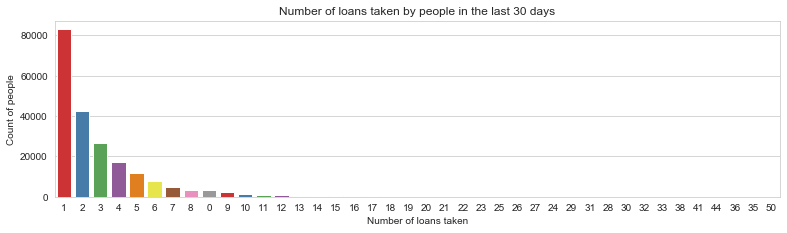

In [18]:
#Counting the number of loans taken by people in the last 30 days
print(df['cnt_loans30'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='cnt_loans30',data=df,palette='Set1',order= df['cnt_loans30'].value_counts().index)
plt.title('Number of loans taken by people in the last 30 days')
plt.xlabel('Number of loans taken')
plt.ylabel('Count of people')
plt.show()

1. 83028 is the maximum number of people who had taken loans and they had taken only once.
2. Single person had taken loans for 41, 50, 36 times etc.

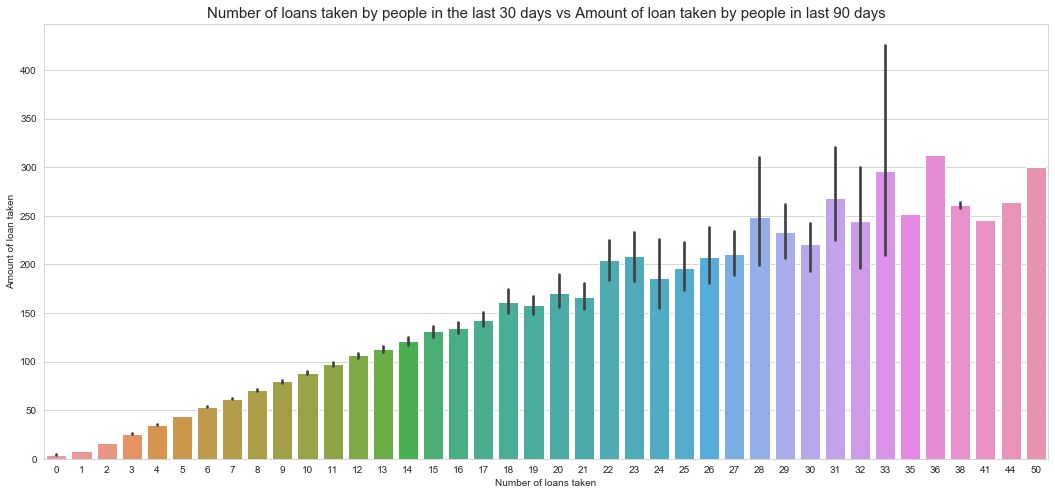

In [19]:
#Checking the number of loans taken by people in last 30 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='amnt_loans90', data=df)
plt.title('Number of loans taken by people in the last 30 days vs Amount of loan taken by people in last 90 days', fontsize=15)
plt.xlabel('Number of loans taken')
plt.ylabel('Amount of loan taken')
plt.show()

1. Maximum number of loans taken by the people is 36 and the amount is equivalent to 320.
2. Minimum number of loans taken by the people is 0.

In [20]:
defaulters_data=df.loc[df['label'] == 0 ]
defaulters_data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,20,7
11,0,82.0,65.166667,65.166667,326.20,326.20,17.0,0.0,7526,2,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,20,6
15,0,1037.0,12.000000,12.000000,1216.80,1216.80,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,24,6
16,0,1583.0,1000.000000,1000.000000,1000.80,1087.88,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,4,7
21,0,378.0,514.693333,515.200000,56.26,58.20,2.0,0.0,773,1,...,6.0,0.0,2.0,12,6,0.0,0.0,0.0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209547,0,153.0,5670.733333,5672.200000,1817.08,2764.88,0.0,0.0,0,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,20,7
209549,0,843.0,729.235000,758.470000,7470.90,9537.90,1.0,0.0,770,1,...,6.0,0.0,2.0,12,6,0.0,0.0,25.5,15,7
209554,0,744.0,1454.491667,1461.750000,559.73,655.28,31.0,0.0,2309,0,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,13,7
209571,0,827.0,1867.668667,1881.180000,1875.72,2312.65,14.0,0.0,1924,2,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,13,7


,amnt_loans30
cnt_loans30,
26,156.000000
19,114.000000
18,108.000000
17,102.000000
16,96.000000
15,90.000000
14,87.000000
13,83.250000
12,77.500000


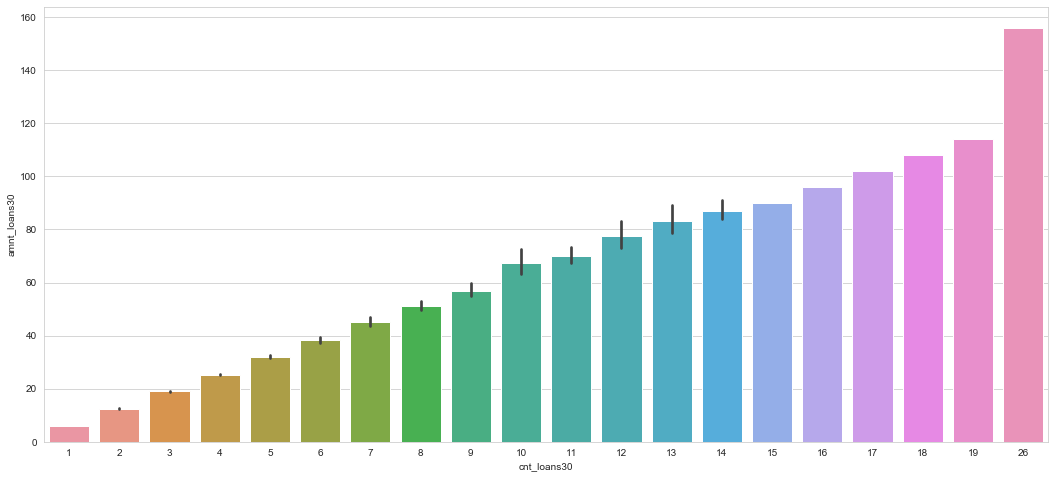

In [21]:
#Checking the number of loans taken by people in last 90 days vs Amount of loan taken by the people in last 90 days.
plt.figure(figsize=(18,8))
sns.barplot(x='cnt_loans30',y='amnt_loans30', data=defaulters_data)
pd.DataFrame(defaulters_data.groupby('cnt_loans30')['amnt_loans30'].mean().sort_values(ascending=False))

1. Maximum number of times the loan taken by the people is 26 and the amount is equivalent to 15.
2. Minimum number of times the loan taken by the people is 1 and the amount is equivalent to 6.

6    13187
7    12846
Name: pdate_month, dtype: int64


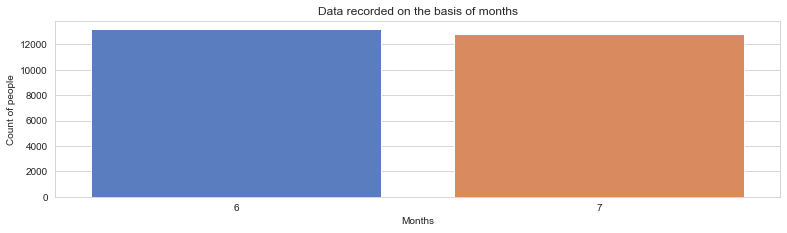

In [22]:
#Data recorded on the basis of months
print(defaulters_data['pdate_month'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(311)
sns.countplot(x='pdate_month',data=defaulters_data,palette='muted',order=defaulters_data['pdate_month'].value_counts().index)
plt.title('Data recorded on the basis of months')
plt.xlabel('Months')
plt.ylabel('Count of people')
plt.show()

1. The records had been available in the months of June and July, whereas there are no records in August.
2. Maximum number of records are available in June with a value of 13187.

20    1182
17    1114
14    1102
22    1101
15    1099
13    1093
10    1090
18    1085
23    1073
12    1063
19    1024
16    1006
11     995
5      993
21     990
6      937
8      935
7      914
9      900
2      841
1      829
3      823
4      800
27     504
26     452
30     451
25     438
24     423
29     413
28     363
Name: pdate_day, dtype: int64


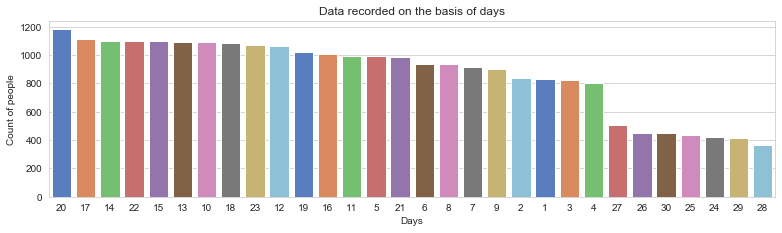

In [23]:
#Data recorded on the basis of days
print(defaulters_data['pdate_day'].value_counts())
plt.figure(figsize = (13,11))
plt.subplot(312)
sns.countplot(x='pdate_day',data=defaulters_data,palette='muted',order=defaulters_data['pdate_day'].value_counts().index)
plt.title('Data recorded on the basis of days')
plt.xlabel('Days')
plt.ylabel('Count of people')
plt.show()

1. On 20th day the maximum number of records are there and the value is 1182.
2. On 28th day, the minimum number of records are there and the value is 363.

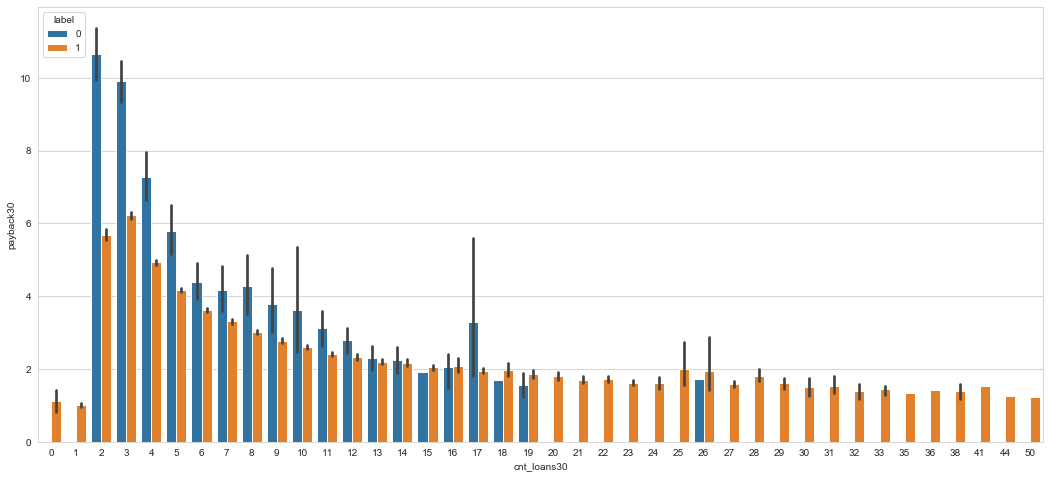

In [24]:
#Checking the maximum number of loans taken vs Amount payed within due dates by people or not on the basis of label
plt.figure(figsize=(18,8))
sns.barplot(x="cnt_loans30",y='payback30',hue='label', data=df)

We can observe that the Average payback time over last 30 days is higher for people who had taken 2 times the loan and say that the users with less number of loan taking are more than the defaulters

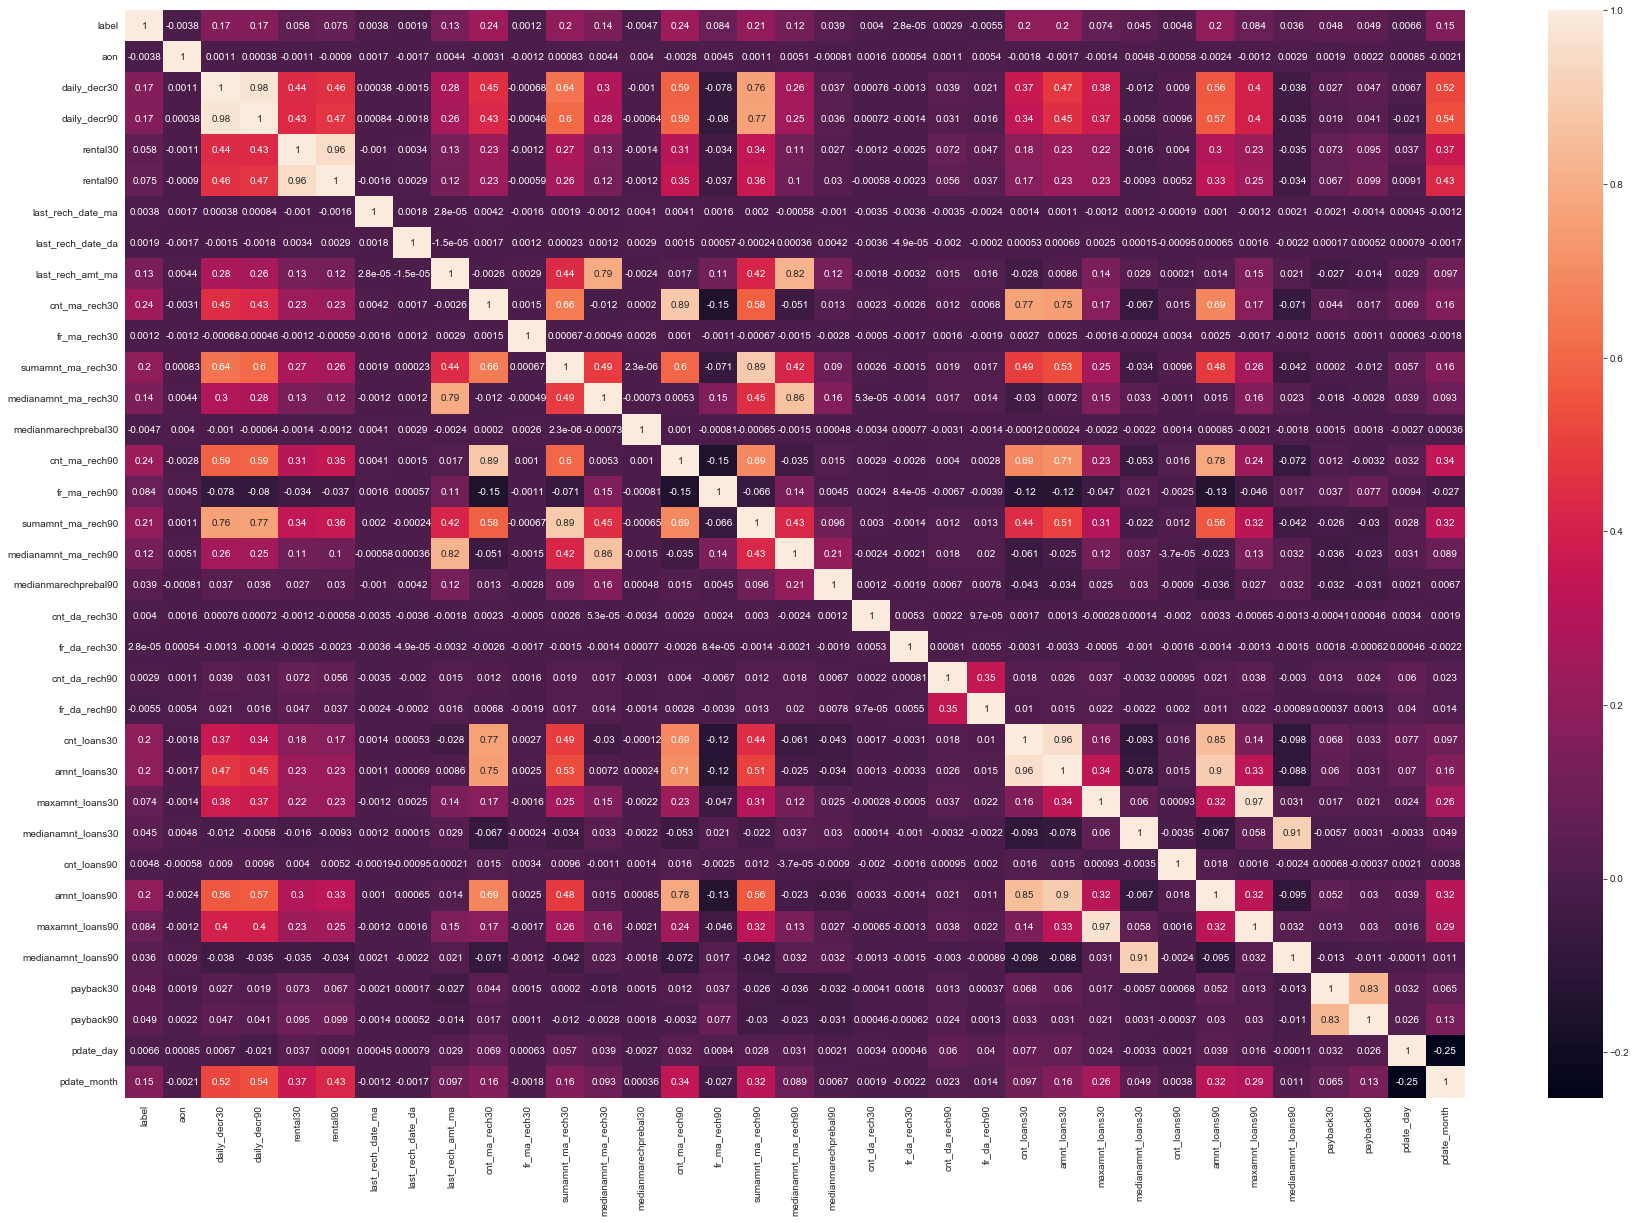

In [25]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

Key Observations:
1. From above we can observe that "cnt_ma_rech30", "cnt_ma_rech90", "sumamnt_ma_rech90", "sumamnt_ma_rech30" have more corelation with the Target variable "label". Lets visualize the feature variable correlation with target variable seprately. 
2. 'daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_amt_ma','cnt_ma_rech30','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'cnt_loans30', 'amnt_loans30', 'amnt_loans90', 'maxamnt_loans90', payback30, payback90, pdate_day, pdate_month have more correlation with each other which is these variables are dependent on each other.

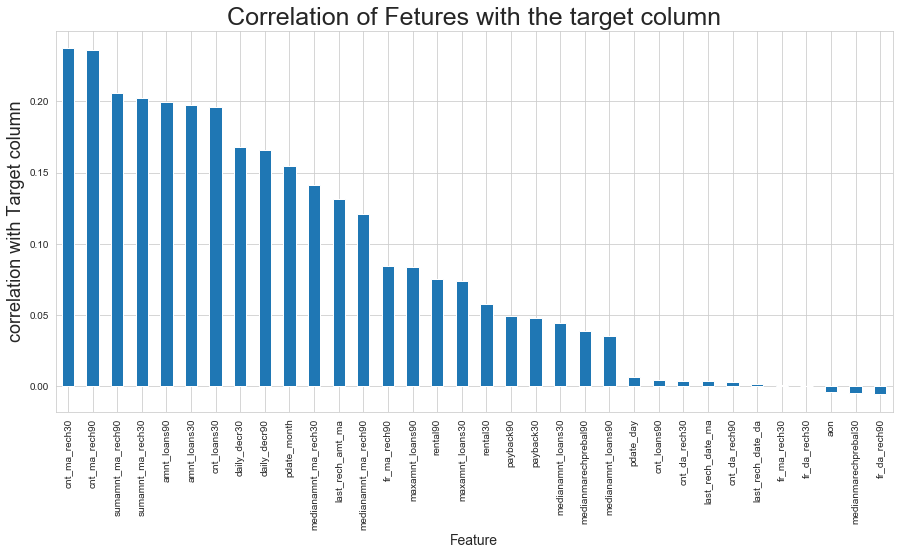

KEY OBSERVATIONS:
 


,label
cnt_ma_rech30,0.237201
cnt_ma_rech90,0.236295
sumamnt_ma_rech90,0.205625
sumamnt_ma_rech30,0.202617
amnt_loans90,0.199648
amnt_loans30,0.197149
cnt_loans30,0.196169
daily_decr30,0.168218
daily_decr90,0.166077
pdate_month,0.154894


In [26]:
plt.figure(figsize=(15,7))
df.corr()["label"].sort_values(ascending=False).drop(["label"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["label"].sort_values(ascending=False)).drop(["label"])
print("KEY OBSERVATIONS:\n ")
cor

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['pdate_month']=le.fit_transform(df['pdate_month'])

In [28]:
df.skew()

label                   -2.270133
aon                     10.381002
daily_decr30             3.948996
daily_decr90             4.255728
rental30                 4.529363
rental90                 4.444008
last_rech_date_ma       14.794124
last_rech_date_da       14.803475
last_rech_amt_ma         3.788297
cnt_ma_rech30            3.286166
fr_ma_rech30            14.765000
sumamnt_ma_rech30        6.402491
medianamnt_ma_rech30     3.518815
medianmarechprebal30    14.768285
cnt_ma_rech90            3.425057
fr_ma_rech90             2.285929
sumamnt_ma_rech90        4.905501
medianamnt_ma_rech90     3.759054
medianmarechprebal90    44.907105
cnt_da_rech30           17.815430
fr_da_rech30            14.790495
cnt_da_rech90           27.247129
fr_da_rech90            28.990037
cnt_loans30              2.713836
amnt_loans30             2.977828
maxamnt_loans30          1.428554
medianamnt_loans30       4.556319
cnt_loans90             16.620213
amnt_loans90             3.152033
maxamnt_loans9

Skewness is present

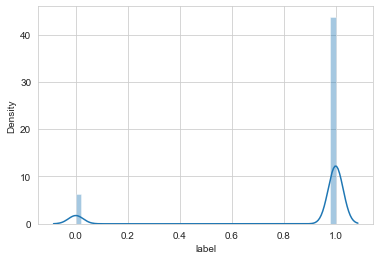

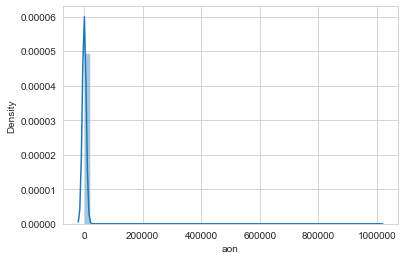

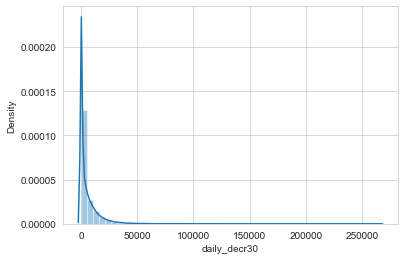

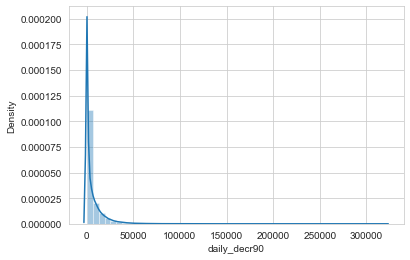

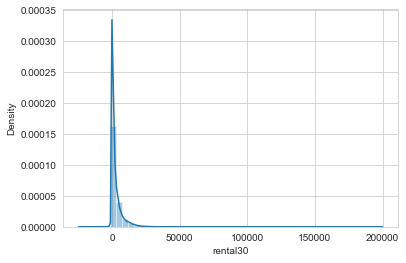

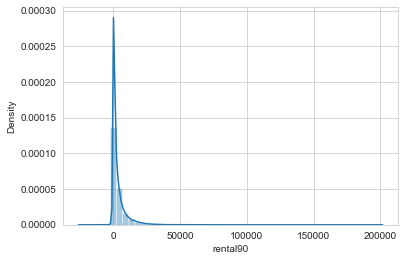

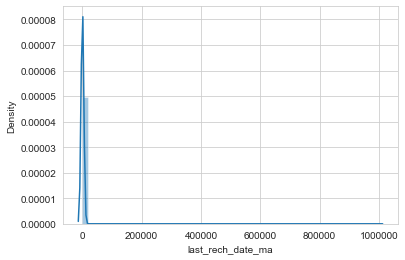

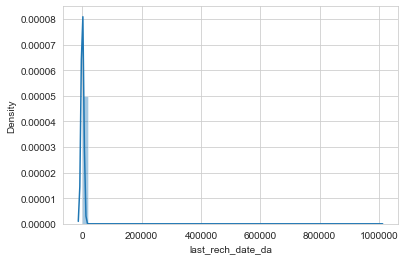

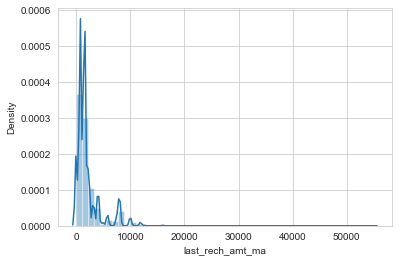

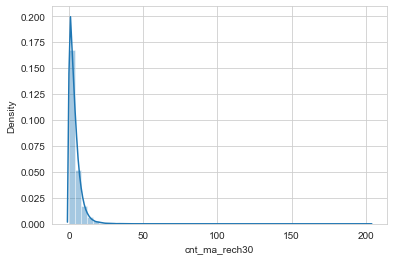

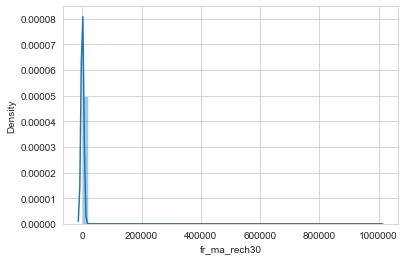

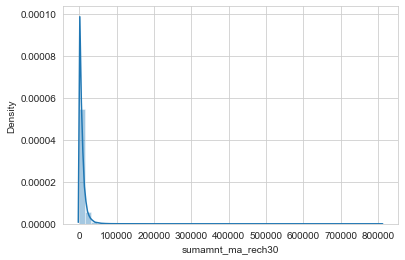

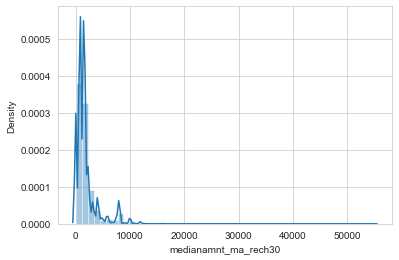

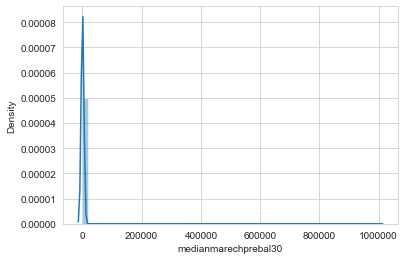

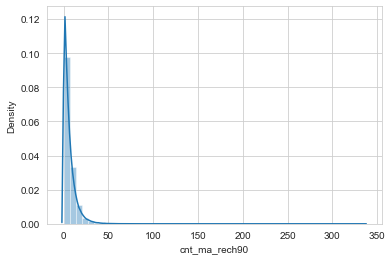

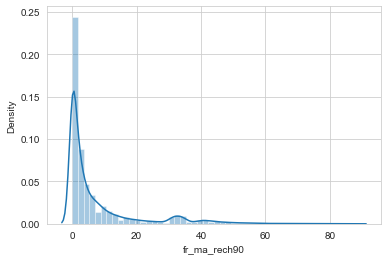

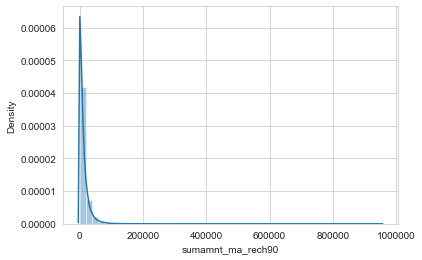

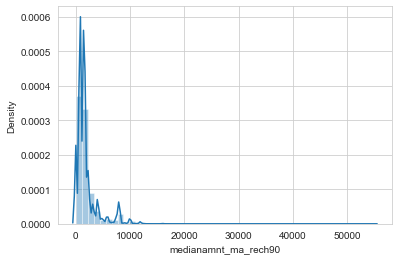

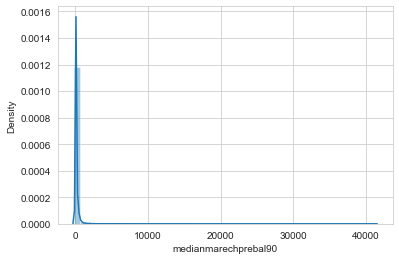

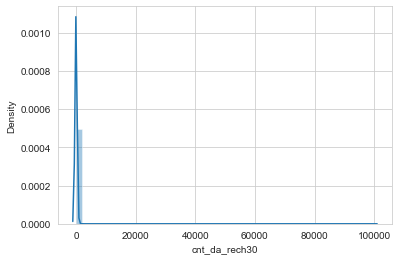

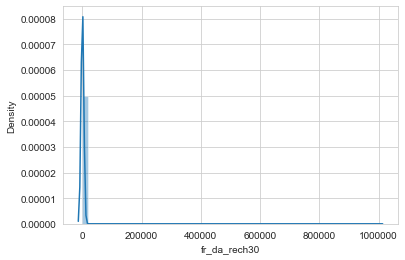

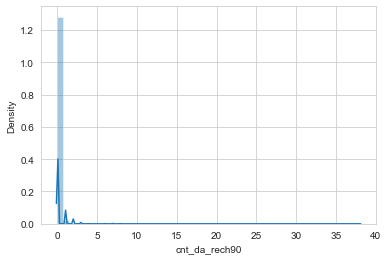

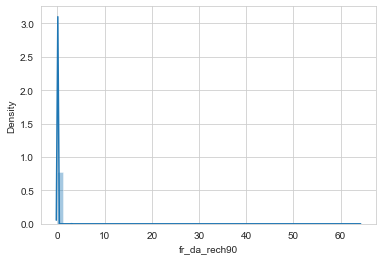

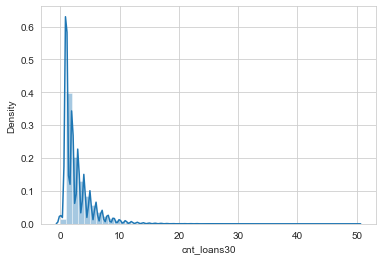

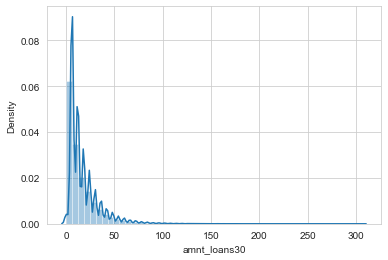

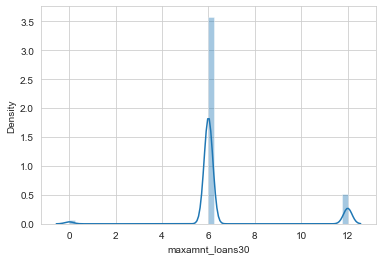

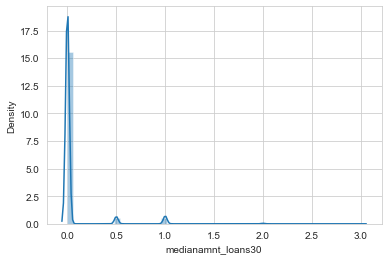

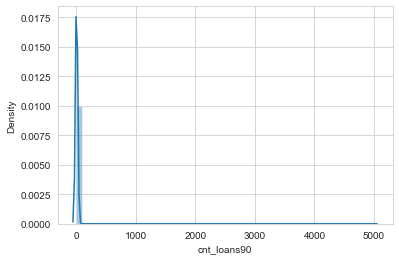

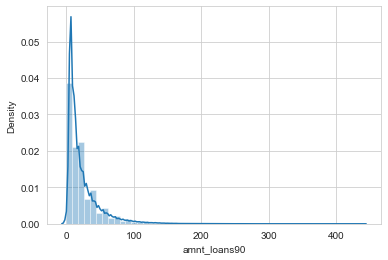

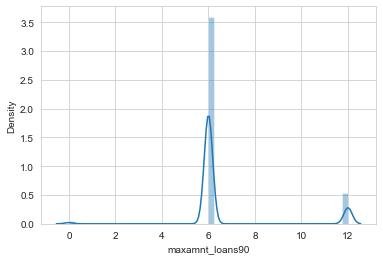

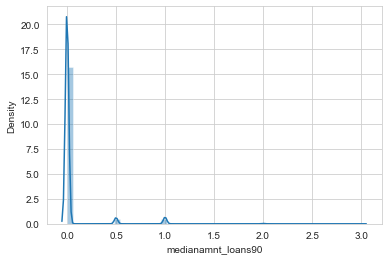

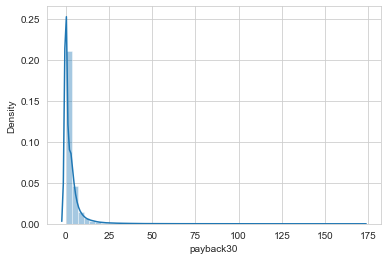

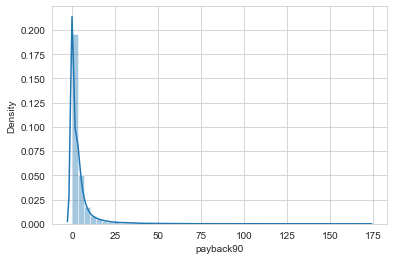

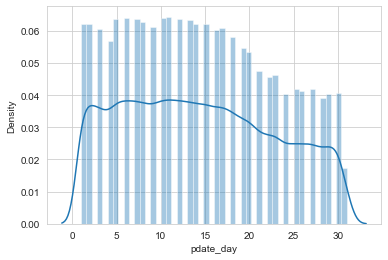

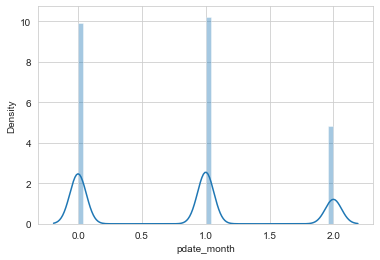

In [29]:
#Plotting distplot for checking the distribution of skewness
for col in df.columns:
    sns.distplot(df[col])
    plt.show()

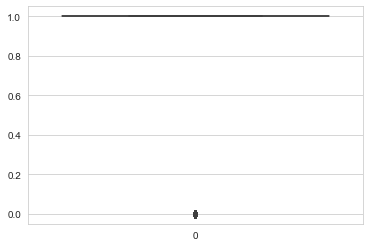

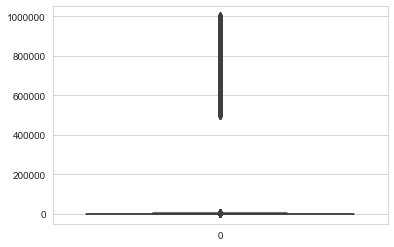

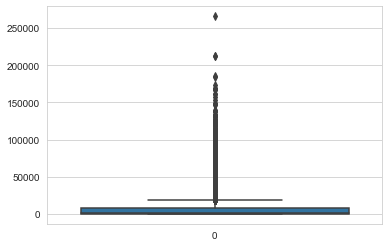

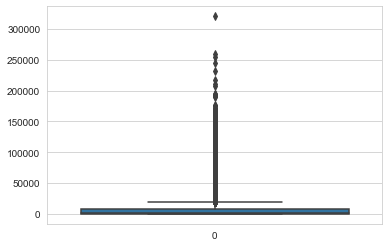

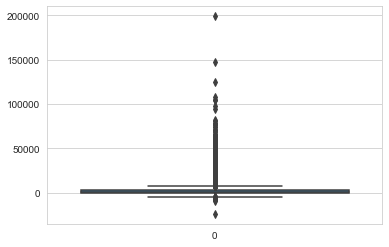

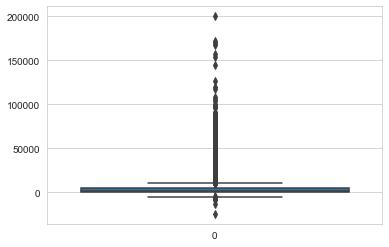

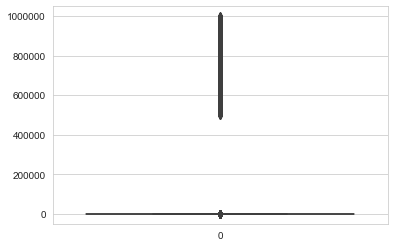

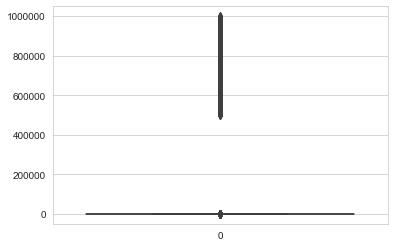

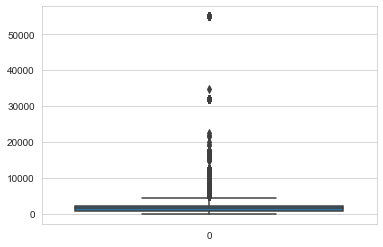

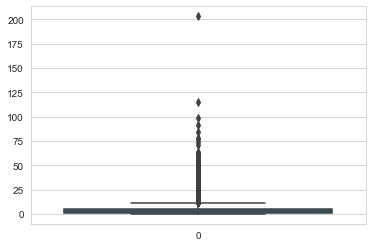

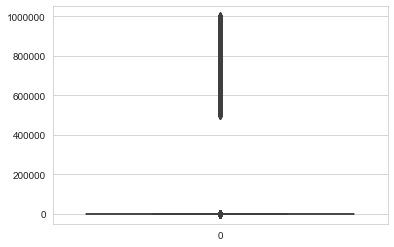

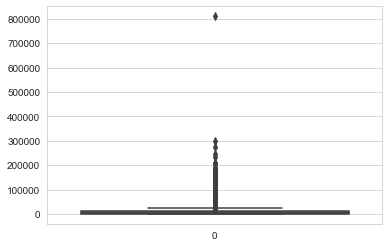

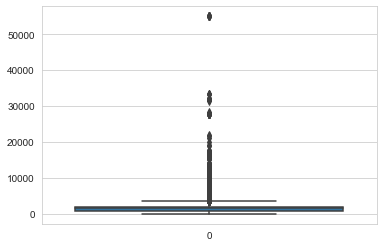

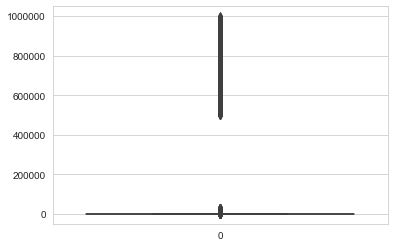

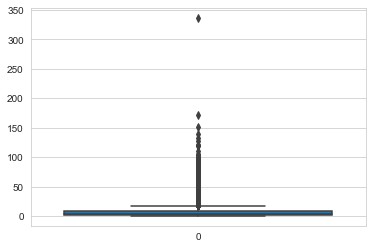

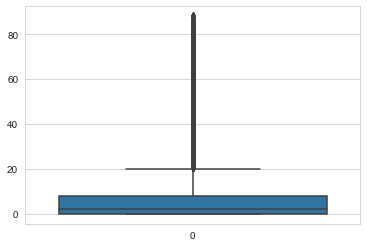

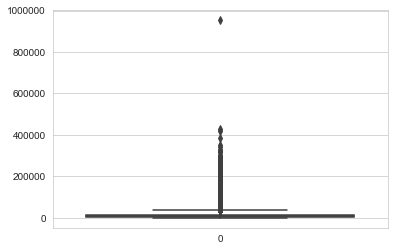

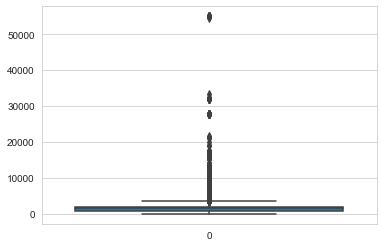

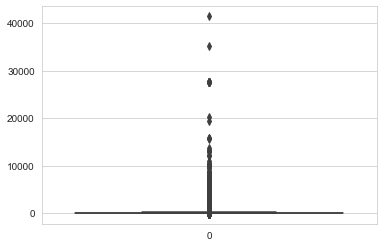

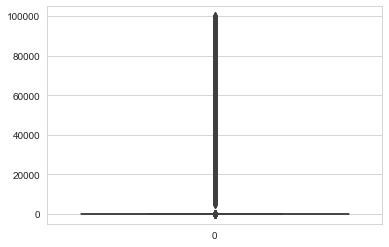

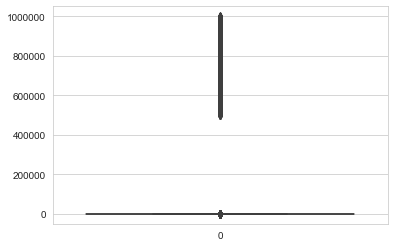

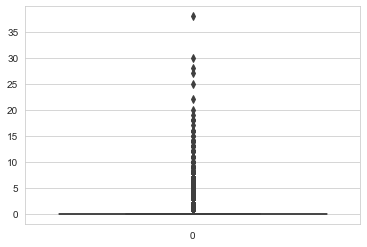

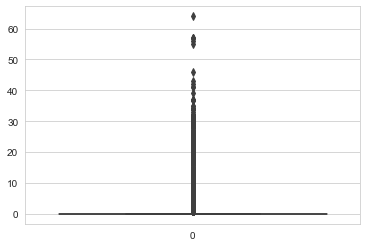

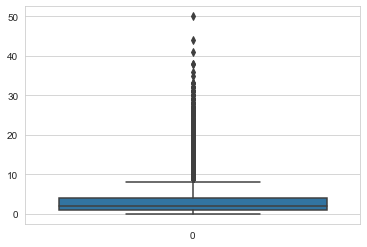

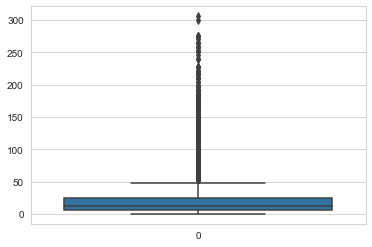

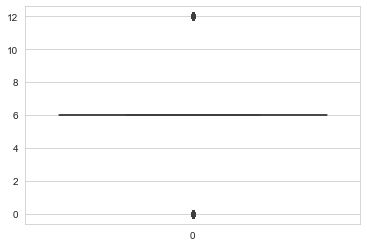

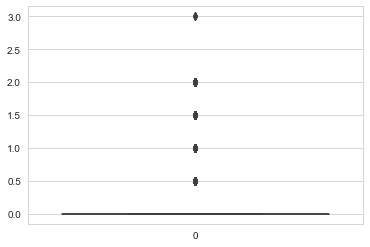

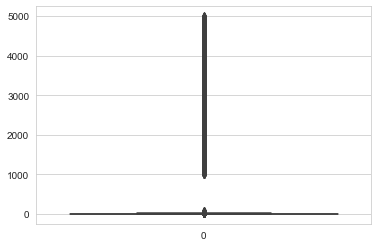

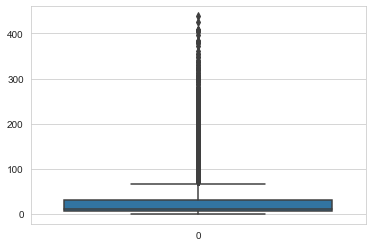

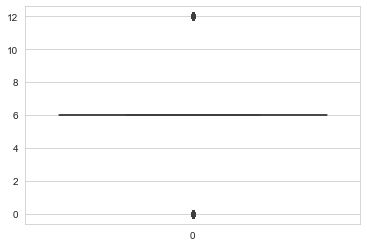

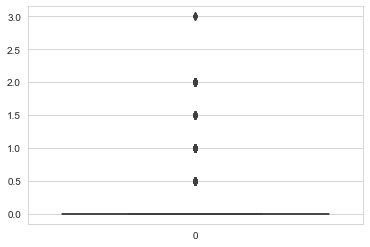

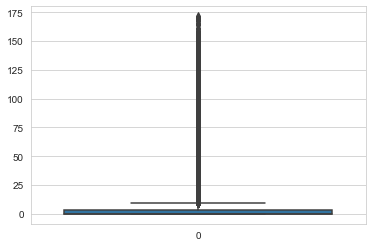

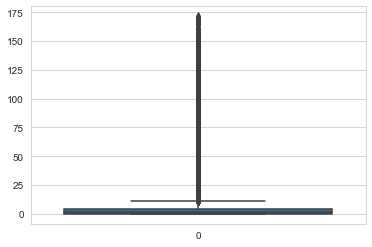

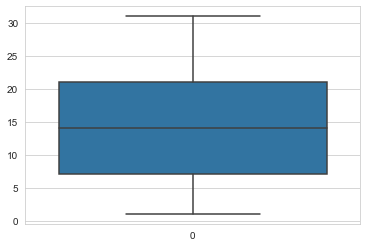

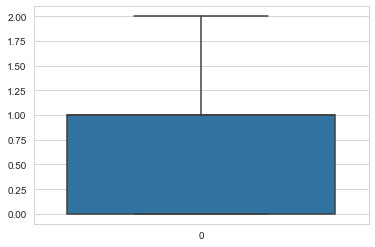

In [30]:
#lets plot the boxplot to identify the outliers.
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

all the columns has outliers

In [31]:
#removing outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3    
np.where(z>3)

(array([    21,     22,     22, ..., 208538, 208539, 208539], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [32]:
df_new=df[(z<3).all(axis=1)]
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_day,pdate_month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20,1
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,2
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,19,2
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,17,0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,0
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,29,1
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,25,1


In [33]:
print(f"Orginal Data {df.shape}\n After Removing outliers {df_new.shape}\nThe percentage of data loss {((209592-161465)/209592)*100}%")

Orginal Data (208545, 35)
 After Removing outliers (160511, 35)
The percentage of data loss 22.96223138287721%


In [34]:
x_1=df.drop(["label"], axis = 1)
y_1=df.label

In [35]:
#removing the skewness
from sklearn.preprocessing import power_transform
x_1=power_transform(x_1,method="yeo-johnson")
x_1

array([[-0.17734716,  0.33175317,  0.29877853, ...,  1.78374336,
         0.71105611,  0.44422075],
       [ 0.0362569 ,  1.11589432,  1.04492862, ..., -1.01882948,
        -0.41004265,  1.42037093],
       [-0.0348628 , -0.00795274, -0.02863997, ..., -1.01882948,
         0.61019396,  1.42037093],
       ...,
       [ 0.13438393,  1.10032076,  1.03326288, ...,  0.75297515,
         1.54709392,  0.44422075],
       [ 0.30889535,  1.13594014,  1.06823637, ...,  1.3377511 ,
         1.18967987,  0.44422075],
       [ 0.27686082,  0.52466511,  0.48679579, ..., -1.01882948,
        -0.81935092,  0.44422075]])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i,  stratify=y_1 )
    mod = GaussianNB()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = accuracy_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 74.23135201488387 found on randomstate 142


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate, stratify=y_1)

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics

In [39]:
def mod_sco(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

    
    result = {
        "Accuracy": accuracy,
        "Accuracy std": accuracy_std,
        "Precision": precision,
        "Precision std": precision_std,
        "Recall": recall,
        "Recall std": recall_std,
        "f1": f1,
        "f1 std": f1_std,
    }
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return result

In [40]:
models = [LogisticRegression(), GaussianNB(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42)]

model_names = ["LogisticRegression", "Naive Bayes Gaussian", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting"]

In [41]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"............................................................running {model_names[model]}")
    
    clf_scores = mod_sco(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
............................................................running LogisticRegression
Accuracy: 0.8816236992219618 - (std: 0.0005520890854226318)
Precision: 0.8549570031024831 - (std: 0.001400491740342232)
Recall: 0.8816236992219618 - (std: 0.0005520890854226318)
f1: 0.8480385303389937 - (std: 0.0012827879532514963)


Step 2 of 7
............................................................running Naive Bayes Gaussian
Accuracy: 0.7418610380341459 - (std: 0.001436322628063319)
Precision: 0.872462440613174 - (std: 0.0014138283972939915)
Recall: 0.7418610380341459 - (std: 0.001436322628063319)
f1: 0.7824354326876054 - (std: 0.0012262195174549586)


Step 3 of 7
............................................................running Random Forest
Accuracy: 0.9213786946429506 - (std: 0.0012750718157669568)
Precision: 0.9148988322876717 - (std: 0.0015595827373447854)
Recall: 0.9213786946429506 - (std: 0.0012750718157669568)
f1: 0.9139174986306111 - (std: 0.001585516329039094)


Step

In [42]:
classification_result = pd.DataFrame({"Model": model_names,
                                      "accuracy": accuracy,
                                      "precision": precision,
                                      "recall": recall,
                                      "f1": f1})
classification_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
2,Random Forest,0.921379,0.914899,0.921379,0.913917
6,Gradient Boosting,0.918540,0.911521,0.918540,0.909774
5,Ada Boost,0.910139,0.901637,0.910139,0.896462
3,Decision Tree,0.883919,0.886383,0.883919,0.885099
4,Extra Tree,0.875505,0.876716,0.875505,0.876099
0,LogisticRegression,0.881624,0.854957,0.881624,0.848039
1,Naive Bayes Gaussian,0.741861,0.872462,0.741861,0.782435


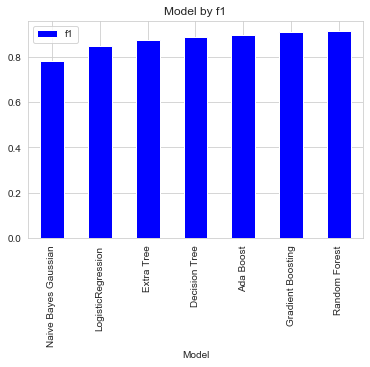

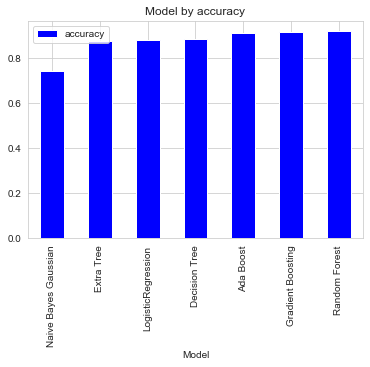

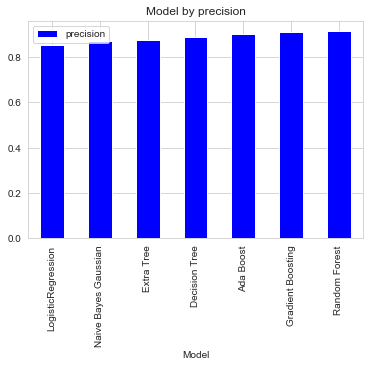

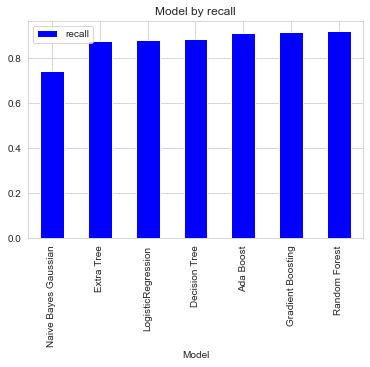

In [43]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    classification_result.sort_values(by=metric).plot.bar("Model", metric, color = "blue")
    plt.title(f"Model by {metric}")
    plt.show()

### Key Observation:

 Among our model we have Random Forest tops the chart. Lets hypertune RandomForest.
 RF-F1score = 0.913917

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [45]:
clf_rf= RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob

array([[0.06, 0.94],
       [0.  , 1.  ],
       [0.06, 0.94],
       ...,
       [0.07, 0.93],
       [0.07, 0.93],
       [0.15, 0.85]])

In [47]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

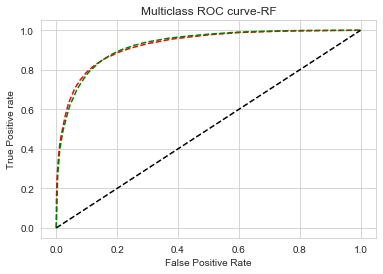

In [48]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve-RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [49]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:
preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

Predicted,0,1
Real,,
0,9932,9593
1,2704,134179


In [51]:
print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62     19525
           1       0.93      0.98      0.96    136883

    accuracy                           0.92    156408
   macro avg       0.86      0.74      0.79    156408
weighted avg       0.91      0.92      0.91    156408



In [52]:
#hyperparameter tunning
param_grid = [
    {'n_estimators': [100, 500], 
    }
]


clf_rf= RandomForestClassifier(random_state=42)

In [53]:
grid_search = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [54]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'n_estimators': [100, 500]}], scoring='f1_weighted',
             verbose=2)

In [55]:
grid_search.best_params_

{'n_estimators': 500}

In [56]:
grid_search.best_score_

0.9128930936860019

In [57]:
final_model = grid_search.best_estimator_
preds = cross_val_predict(final_model, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1
Actual,,
0,9845,9680
1,2616,134267


In [58]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           0       0.79      0.50      0.62     19525
           1       0.93      0.98      0.96    136883

    accuracy                           0.92    156408
   macro avg       0.86      0.74      0.79    156408
weighted avg       0.91      0.92      0.91    156408



In [59]:
y_pred = final_model.predict(x_test)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'])

Predicted,0,1
Actual,,
0,3267,3241
1,924,44705


In [60]:
print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61      6508
           1       0.93      0.98      0.96     45629

    accuracy                           0.92     52137
   macro avg       0.86      0.74      0.78     52137
weighted avg       0.91      0.92      0.91     52137



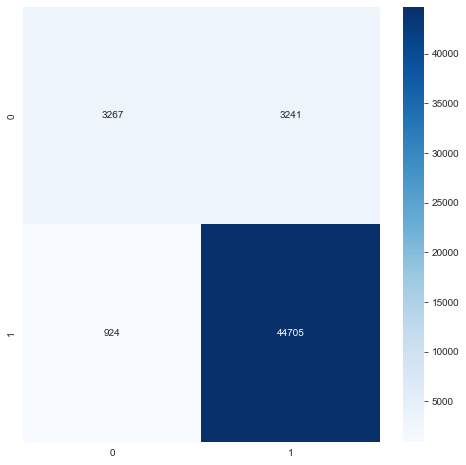

In [61]:
conf_mx = metrics.confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(conf_mx, annot=True, fmt="d", 
                 xticklabels=final_model.classes_,
                 yticklabels=final_model.classes_,
                cmap= "Blues")

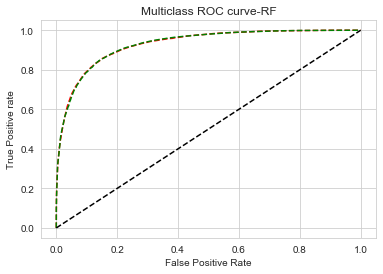

In [62]:
y_pred_prob=final_model.predict_proba(x_test)
y_pred_prob
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
    
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve-RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show() 

In [63]:
mod_sco(final_model, x_train, y_train, cv=5, verbose=True)
scoring = {"accuracy": "accuracy","precision": "precision_weighted",
           "recall": "recall_weighted","f1": "f1_weighted"}
scores = cross_validate(final_model, x_train, y_train, cv=5, scoring=scoring)
accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
f1, f1_std = scores['test_f1'].mean(), scores['test_f1'].std()

Accuracy: 0.9213850905487077 - (std: 0.0015596980172197079)
Precision: 0.9149470127138788 - (std: 0.0019189982249398455)
Recall: 0.9213850905487077 - (std: 0.0015596980172197079)
f1: 0.913685304788354 - (std: 0.0019363676580395786)


In [64]:
print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
print(f"Precision: {precision} - (std: {precision_std})")
print(f"Recall: {recall} - (std: {recall_std})")
print(f"f1: {f1} - (std: {f1_std})")

Accuracy: 0.9213850905487077 - (std: 0.0015596980172197079)
Precision: 0.9149470127138788 - (std: 0.0019189982249398455)
Recall: 0.9213850905487077 - (std: 0.0015596980172197079)
f1: 0.913685304788354 - (std: 0.0019363676580395786)


Post the hyperparameter tuning our our model f1 - score increased from f1: 0.91391 to f1: 0.91368 with accuracy of 92.38%

In [66]:
import joblib
joblib.dump(final_model,"MicroCredit_model.obj")

['MicroCredit_model.obj']

In [67]:
pred_results=pd.DataFrame(y_pred)
pred_results.to_csv('MicroCredit_Predictions.csv')